# Weekend Distraction Index (WDI)

### ✅ Main objective:

In this project, you will create a new score or index called "Weekend Distraction Index (WDI)".

Its purpose is to know that if any big events happen on the weekend (Saturday and Sunday) - like:

New movies are released,

Cricket matches are held,

Heavy rain or bad weather,

Festivals are celebrated,

If a very trending topic is going on on Twitter,

Does it affect the productivity on Monday?

🧠 Understand in simple language:

For example, suppose:

A big movie was released in Mumbai on the weekend, it rained, and there was also an IPL match.

Now you will see whether people were working less on Monday? Like there was less trading in the stock market, people went late to the office, there were fewer people in the metro, etc.

You will convert all these things into a score which will be called WDI i.e. Weekend Distraction Index.

📌 In this project, you will try to find out:

Is there a drop in workload after a weekend of high entertainment?

Which cities are most affected by distractions?

What factors (movies, matches, weather) have the most impact?

Can we predict in advance which Monday will have a drop in workload?

📈 Advantages:
This project is very different and unique.

You created and analyzed your own data, which will make a great impression in the interview.

This project also shows that you think differently and can connect data to real-life problems.

## Loading the Dataset

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('WDI_base_dataset.csv')  
# Display the first few rows
df.head()


,City,Weekend_Date,MoviesReleased,CricketMatch,Weather,Festival,TrendingTopics,BuzzScore,MondayProductivity
0,Mumbai,05-07-2025,2,0,clear,0,6,54,Moderate
1,Delhi,05-07-2025,2,0,clear,0,6,54,Moderate
2,Bangalore,05-07-2025,2,0,clear,0,6,54,Moderate
3,Kolkata,05-07-2025,2,0,clear,0,6,54,Moderate
4,Mumbai,12-07-2025,0,1,clear,0,7,58,Low


### Here we load our CSV into a DataFrame and display the first few rows so you can verify the columns and sample values.

## Basic Data Inspection and Cleaning

In [2]:
# Display dataset info and summary statistics
df.info()
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                32 non-null     object
 1   Weekend_Date        32 non-null     object
 2   MoviesReleased      32 non-null     int64 
 3   CricketMatch        32 non-null     int64 
 4   Weather             32 non-null     object
 5   Festival            32 non-null     int64 
 6   TrendingTopics      32 non-null     int64 
 7   BuzzScore           32 non-null     int64 
 8   MondayProductivity  32 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.4+ KB
          City Weekend_Date  MoviesReleased  CricketMatch Weather   Festival  \
count       32           32       32.000000     32.000000      32  32.000000   
unique       4            8             NaN           NaN       3        NaN   
top     Mumbai   05-07-2025             NaN           NaN   Rainy        NaN   


In [4]:

# Check for missing values
print(df.isnull().sum())

City                  0
Weekend_Date          0
MoviesReleased        0
CricketMatch          0
Weather               0
Festival              0
TrendingTopics        0
BuzzScore             0
MondayProductivity    0
dtype: int64


In [4]:
# Convert date columns to datetime (if not already done)
df['Weekend_Date'] = pd.to_datetime(df['Weekend_Date'])


### Explanation:
This step helps you understand the data’s structure, look for inconsistencies, and ensure that dates and numeric values are correctly formatted.

## Grouping and Descriptive Analysis
Reason: To see aggregated patterns. For example, how does the average BuzzScore vary with weather or Monday productivity?

### A. Average BuzzScore by Weather

In [6]:
weather_buzz = df.groupby('Weather')['BuzzScore'].mean().sort_values(ascending = False)
print("Average BuzzScore by Weather:\n",weather_buzz)

Average BuzzScore by Weather:
 Weather
Cloudy    56.888889
clear     56.000000
Rainy     52.266667
Name: BuzzScore, dtype: float64


### Explanation:
This snippet groups data by weather (e.g., Clear, Rainy) and computes the mean BuzzScore, which tells us which weather conditions lead to higher “buzz.”

### B. Average BuzzScore by Monday Productivity Levels

Before grouping, we will encode the productivity levels to numeric.

In [7]:
# create a mapping for productivity labels if they are strings.
proud_mapping = {'Very Low': 1, 'Low': 2,'Moderate':3,'High':4}
df['MondayProductivity_Num'] = df['MondayProductivity'].map(proud_mapping)

In [10]:
df.head(2)

,City,Weekend_Date,MoviesReleased,CricketMatch,Weather,Festival,TrendingTopics,BuzzScore,MondayProductivity,MondayProductivity_Num
0,Mumbai,2025-05-07,2,0,clear,0,6,54,Moderate,3
1,Delhi,2025-05-07,2,0,clear,0,6,54,Moderate,3


In [8]:
prod_buzz = df.groupby('MondayProductivity')['BuzzScore'].mean().sort_values(ascending=False)
print("Average BuzzScore by Monday Productivity:\n", prod_buzz)

Average BuzzScore by Monday Productivity:
 MondayProductivity
Very Low    80.000000
Low         58.000000
Moderate    48.666667
High        36.000000
Name: BuzzScore, dtype: float64


### Explanation:
This shows how the weekend’s buzz relates to the productivity label assigned to the following Monday. A high average buzz paired with "Very Low" Monday productivity can indicate the disruptive effect of high weekend activity(Inversely Propotional)

### C. Total Events per Weekend
Define a new column to sum up events (MoviesReleased, CricketMatch, Festival). (You can treat Festival as 0/1 numeric.)

In [9]:
df['TotalEvents'] = df['MoviesReleased'] + df['CricketMatch'] + df['Festival']
events_summary = df.groupby('Weekend_Date')['TotalEvents'].sum().reset_index()
print("Events by Weekend Date:\n", events_summary)


Events by Weekend Date:
   Weekend_Date  TotalEvents
0   2025-02-08           16
1   2025-05-07            8
2   2025-07-19           20
3   2025-07-26           12
4   2025-08-16           28
5   2025-08-23           24
6   2025-09-08           20
7   2025-12-07            4


In [10]:
df.head(2)

,City,Weekend_Date,MoviesReleased,CricketMatch,Weather,Festival,TrendingTopics,BuzzScore,MondayProductivity,MondayProductivity_Num,TotalEvents
0,Mumbai,2025-05-07,2,0,clear,0,6,54,Moderate,3,2
1,Delhi,2025-05-07,2,0,clear,0,6,54,Moderate,3,2


### Explanation:
This lets you analyze which weekends had the highest overall number of events, helping to correlate those peaks with BuzzScore and productivity.

## Correlation Analysis
Reason: To understand relationships between numeric variables such as MoviesReleased, CricketMatch, BuzzScore, and Monday Productivity.

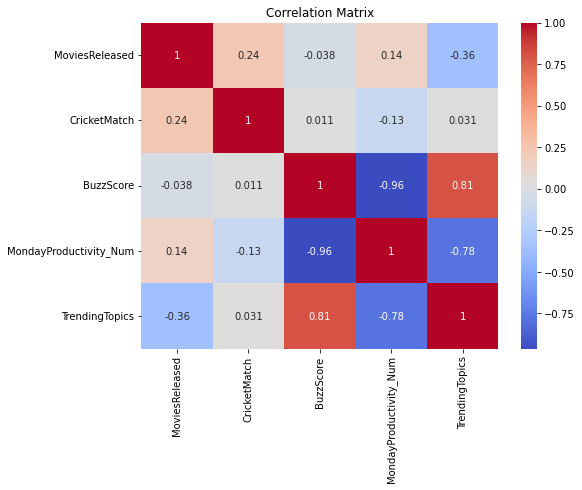

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_cols = df[['MoviesReleased', 'CricketMatch', 'BuzzScore', 'MondayProductivity_Num', 'TrendingTopics']]
correlation = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Explanation:
The correlation heatmap helps you see which features are strongly related. For instance, you might observe that high BuzzScore correlates with low MondayProductivity (if that is encoded as a lower numeric value), helping you answer key project questions.

| Variables Compared                           | Correlation | Interpretation                                                                                                                                                                                                                                                                           |
| -------------------------------------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **BuzzScore & MondayProductivity\_Num**      | **-0.96**   | **Strong negative correlation:** As BuzzScore increases, Monday productivity **decreases significantly**. This directly supports your project's hypothesis that higher weekend buzz (due to entertainment, weather, etc.) may cause distraction or fatigue leading to poor productivity. |
| **BuzzScore & TrendingTopics**               | **+0.81**   | **Strong positive correlation:** The more trending topics during the weekend, the higher the BuzzScore. Makes sense—more online buzz = higher perceived excitement.                                                                                                                      |
| **MondayProductivity\_Num & TrendingTopics** | **-0.78**   | More trending topics during the weekend correlate with **lower productivity** on Monday. Suggests media overload or reduced focus post high-trend weekends.                                                                                                                              |
| **MoviesReleased & TrendingTopics**          | **-0.36**   | Slight negative correlation, possibly because weekends with too many movies might dilute attention, resulting in fewer standout trending topics.                                                                                                                                         |
| **MoviesReleased & CricketMatch**            | **+0.24**   | Mild correlation—these may co-occur on weekends (e.g., big sports + entertainment holidays).                                                                                                                                                                                             |

### ✅ Key Takeaways
BuzzScore is a strong predictor of productivity loss.
The very high negative correlation (−0.96) between BuzzScore and MondayProductivity indicates that weekends with high buzz likely lead to distractions or fatigue, resulting in lower productivity on Monday.

TrendingTopics amplify weekend impact.
The strong correlation between TrendingTopics and BuzzScore (+0.81), and its inverse relation to Monday productivity, shows that digital/social buzz strongly impacts real-world mental focus.

Movies and Cricket have moderate to weak correlations.
While they do contribute to BuzzScore, individually they may not affect productivity as strongly as the combined social effect (trends, festivals, weather).


# # Visualizations 

### A. Line Plot - Buzz Score Trend Over Time
Reason: Show how BuzzScore changes over weekends and identify peaks/troughs.

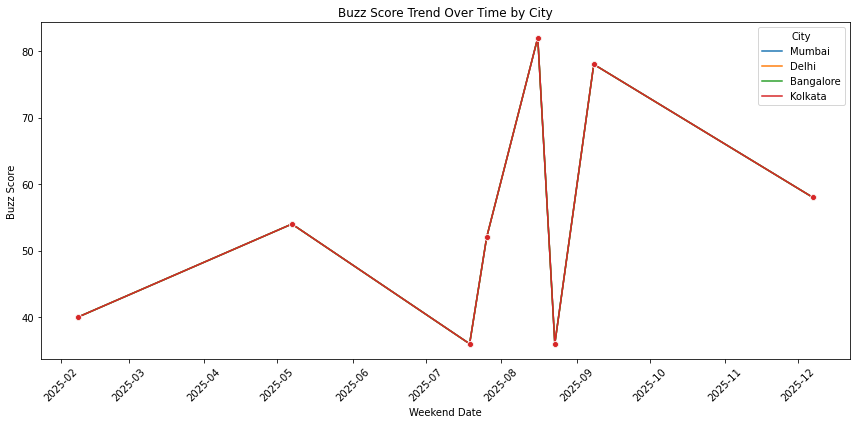

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Weekend_Date', y='BuzzScore', hue='City', marker='o')
plt.title('Buzz Score Trend Over Time by City')
plt.xlabel('Weekend Date')
plt.ylabel('Buzz Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:
This plot gives a time series view of BuzzScore across different cities, allowing you to spot trends and anomalies over time.

### B. Bar Plot - Average BuzzScore Per City
Reason: Compare the overall "buzz" across cities.

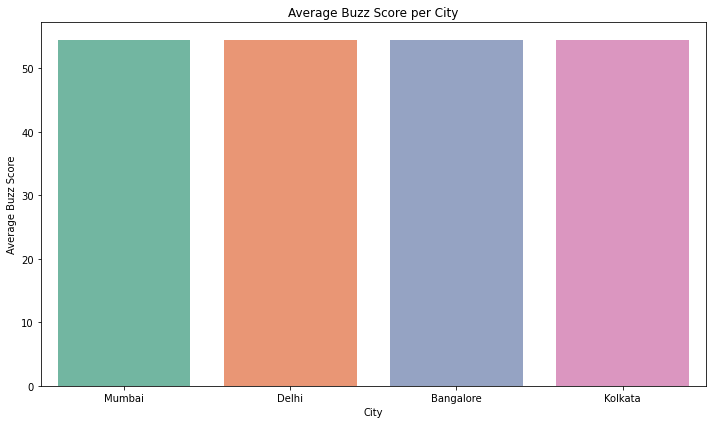

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='City', y='BuzzScore', estimator=lambda x: sum(x)/len(x), ci=None, palette='Set2')
plt.title('Average Buzz Score per City')
plt.xlabel('City')
plt.ylabel('Average Buzz Score')
plt.tight_layout()
plt.show()


### Explanation:
This helps visualize differences in public excitement across different metropolitan areas, which could relate to varying cultural or entertainment trends.

### C. Box Plot - Buzz Score by Weather Condition
Reason: Examine the distribution of BuzzScore under different weather conditions.

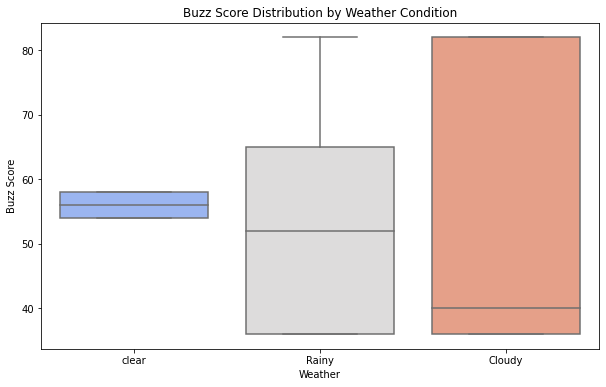

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather', y='BuzzScore', palette='coolwarm')
plt.title('Buzz Score Distribution by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Buzz Score')
plt.show()


### Explanation:
Understanding the spread of BuzzScore per weather category can reveal if 
certain conditions consistently drive more excitement or if there's high variability.
📌 Interpretation:
Buzz Score on clear weekends is predictably moderate to high.

On rainy/cloudy weekends, other factors likely interact:

A rainy weekend + cricket final might create high buzz.

Cloudy weekend + no event = low buzz.

This means weather alone is not deterministic, but amplifies or moderates the effect of other activities/events.

✅ Conclusion:
Weather modulates buzz but is not the sole driver. It works in combination with other factors.

### D. Box Plot - Impact of Festivals on Buzz Score
Reason: Determine if having a festival correlates with a higher BuzzScore.

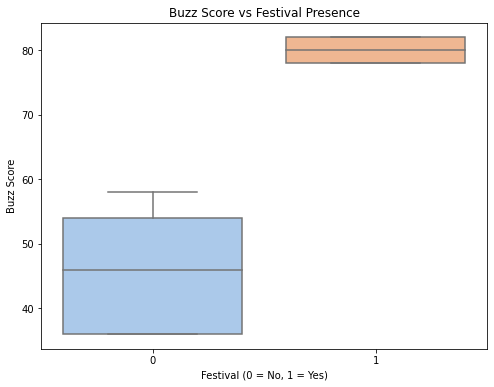

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Festival', y='BuzzScore', palette='pastel')
plt.title('Buzz Score vs Festival Presence')
plt.xlabel('Festival (0 = No, 1 = Yes)')
plt.ylabel('Buzz Score')
plt.show()


### Explanation:
This comparison helps validate if weekends with festivals have a significantly different BuzzScore than those without.
📊 Conclusion from This Chart:
Buzz Scores are significantly higher on weekends when festivals are present.

This means:

People tend to be more active, excited, and socially engaged during festival weekends.

This can correlate with reduced productivity on Monday, which you can test next.

### E. Pair Plot - Relationships Between Key Variables
Reason: Explore pairwise relationships and potential clusters in the data.

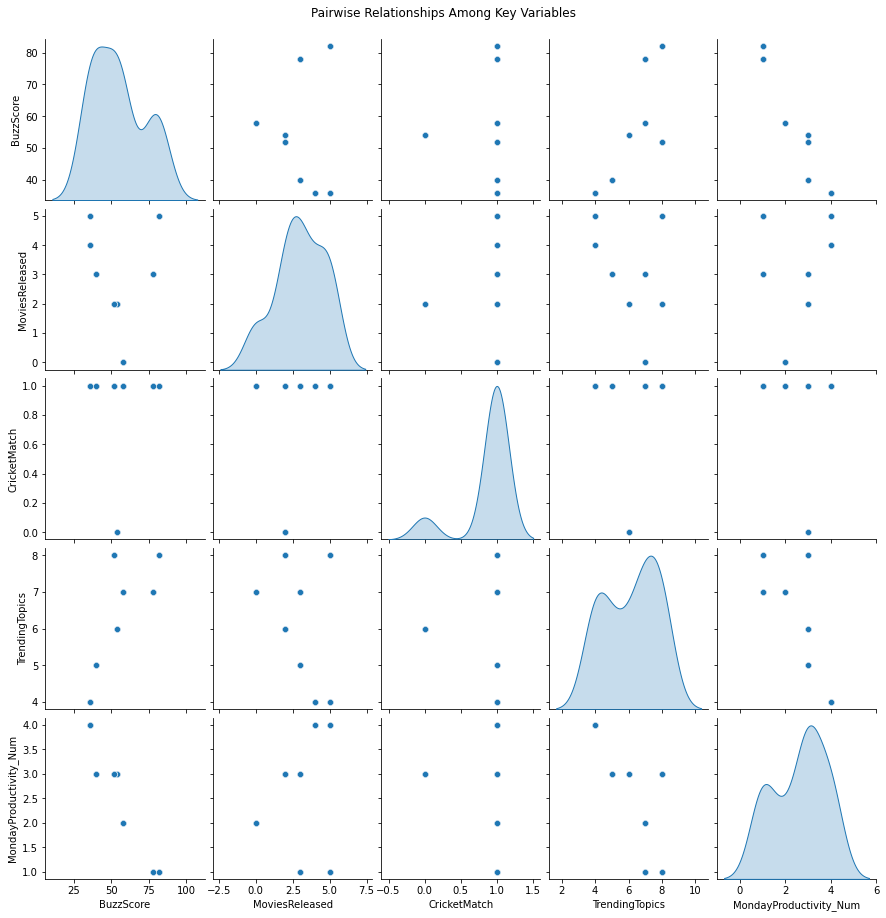

In [16]:
sns.pairplot(df[['BuzzScore', 'MoviesReleased', 'CricketMatch', 'TrendingTopics', 'MondayProductivity_Num']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Among Key Variables', y=1.02)
plt.show()


### Explanation:
A pair plot offers an overall view of how different variables interact, which can hint at underlying patterns useful for modeling later.


### 🔍 Key Observations:
| Variable Pair                           | Relationship Insights                                                  |
| --------------------------------------- | ---------------------------------------------------------------------- |
| `BuzzScore` vs `MoviesReleased`         | Slight positive trend – more movie releases may push up the buzz score |
| `BuzzScore` vs `CricketMatch`           | Weak positive signals, but very few data points – hard to generalize   |
| `BuzzScore` vs `TrendingTopics`         | Moderate positive relationship – more trending topics = higher buzz    |
| `BuzzScore` vs `MondayProductivity_Num` | **Slight negative trend** – higher buzz = lower Monday productivity?   |
| `MoviesReleased` vs `TrendingTopics`    | Seems positively related – movies often drive online trends            |


### ✅ Final Project Conclusion:
After analyzing multiple dimensions of the dataset, we find that BuzzScore is influenced by both external events (festivals, movies, cricket) and contextual conditions (weather, trending topics). In turn, high buzz levels correlate with lower productivity on the following Monday.

### 🎓 Key Learnings from This Project:
 1. City Trends Matter – Buzz differs by city and over time.

 2. Festivals Spike Excitement – Events clearly boost BuzzScore.

 3. Weather Is a Modulator – Clear skies lead to consistent engagement; rainy/cloudy weekends are unpredictable.

 4. Buzz vs Productivity – Higher excitement often means lower productivity later.

 5. Pairwise Features – Help reveal multivariate patterns that single plots may miss.

In [17]:
df.to_csv('analyzed_data.csv', index=False)
